# Comparatif de salaires MCF et PU

L'idée ici est d'estimer', année par année, l'apport en salaire correspondant à un passage de MCF vers PU, en fonction de l'échelon MCF atteint au moment de la promotion.

Les données utilisées sont issues des pages Wikipedia francophones ["Maître de Conferences"](https://fr.wikipedia.org/wiki/Ma%C3%AEtre_de_conf%C3%A9rences_(France)#R%C3%A9mun%C3%A9ration) et ["Professeur des Universités"](https://fr.wikipedia.org/wiki/Professeur_des_universit%C3%A9s#R%C3%A9mun%C3%A9ration).
On considère les traitements mensuels nets.

In [29]:
salaires_mcf = {
    "1": 1794.74,
    "2": 2010.56,
    "3": 2211.24,
    "4": 2434.63,
    "5": 2623.95,
    "6": 2798.13,
    "7": 2911.72,
    "8": 3040.45,
    "9": 3142.69
}

anciennete_cumulee_mcf = {
    "1": 0,
    "2": 1,
    "3": 3 + 10/12,
    "4": 6 + 8/12,
    "5": 9.5,
    "6": 12 + 4/12,
    "7": 15 + 10/12,
    "8": 18 + 8/12,
    "9": 21.5
}

In [30]:
salaires_pu = {
    "1": 2611.06,
    "2": 2759.82,
    "3": 2908.58,
    "4": 3072.99,
    "5": 3229.58,
    "6.1": 3464.46,
    "6.2": 3601.47,
    "6.3": 3785.46,
    "7.1": 3785.46,
    "7.2": 3945.96,
    "7.3": 4157.35
}

anciennete_cumulee_pu = {
    "1": 0,
    "2": 1,
    "3": 2,
    "4": 3,
    "5": 4,
    "6.1": 7.5,
    "6.2": 8.5,
    "6.3": 9.5,
    "7.1": 11,
    "7.2": 12,
    "7.3": 13
}

In [31]:
def get_salaire(annee, grille_salaires, grille_anciennete):
    liste_echelons_ok = [k for k, v in grille_anciennete.items() if v <= annee]
    return max([grille_salaires[k] for k in liste_echelons_ok])

def get_echelon_superieur(salaire, grille_salaires):
    liste_echelons_ok = [k for k, v in grille_salaires.items() if v > salaire]
    return min([ech for ech in liste_echelons_ok])
    

In [32]:
mon_anciennete = 14
mon_salaire = get_salaire(mon_anciennete, salaires_mcf, anciennete_cumulee_mcf)
mon_echelon_pu = get_echelon_superieur(mon_salaire, salaires_pu)
mon_anciennete_pu = anciennete_cumulee_pu[mon_echelon_pu]
print(mon_echelon_pu, mon_anciennete_pu)

3 2


In [33]:
import pandas as pd

data_mcf = pd.DataFrame(
    {
        "annee": [i for i in range(20)],
        "salaire_mcf": [get_salaire(mon_anciennete + i, salaires_mcf, anciennete_cumulee_mcf) for i in range(20)],
        "salaire_pu": [get_salaire(mon_anciennete_pu + i, salaires_pu, anciennete_cumulee_pu) for i in range(20)]
    }
)

data_mcf

,annee,salaire_mcf,salaire_pu
0,0,2798.13,2908.58
1,1,2798.13,3072.99
2,2,2911.72,3229.58
3,3,2911.72,3229.58
4,4,2911.72,3229.58
5,5,3040.45,3229.58
6,6,3040.45,3464.46
7,7,3040.45,3601.47
8,8,3142.69,3785.46
9,9,3142.69,3785.46


<AxesSubplot:xlabel='annee'>

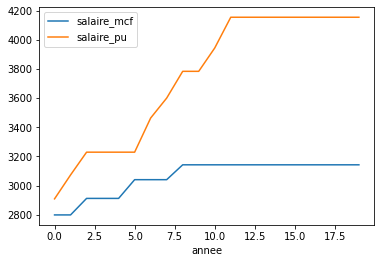

In [34]:
data_mcf.plot(x="annee")